# **Decision Tree - Titanic**

In [4]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X = df[['Pclass', "Sex", "Age", "Fare", "Survived"]]
X = X.dropna()

y = X["Survived"]
X = X.drop("Survived", axis="columns")
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
885,3,female,39.0,29.1250
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
889,1,male,26.0,30.0000


In [6]:
X.Sex = X.Sex.map({'male': 1, 'female': 2})
X

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
885,3,2,39.0,29.1250
886,2,1,27.0,13.0000
887,1,2,19.0,30.0000
889,1,1,26.0,30.0000


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [8]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
model.score(X_train, y_train)

0.9842381786339754

In [10]:
model.score(X_test, y_test)

0.7902097902097902

In [11]:
model.predict([[2, 1, 23, 10]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

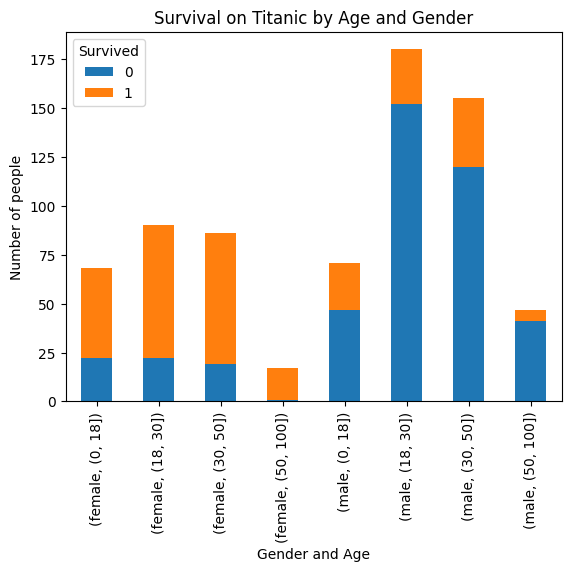

In [15]:
import matplotlib.pyplot as plt

survivors = df.groupby(['Sex', pd.cut(df.Age, [0, 18, 30, 50, 100])])['Survived'].value_counts().unstack()

survivors.plot(kind='bar', stacked=True)

plt.title('Survival on Titanic by Age and Gender')
plt.xlabel('Gender and Age')
plt.ylabel('Number of people')

plt.show()